In [8]:
import pandas as pd
import numpy as np
import sys, os

# Pull in Observed Solar Radiation Data

In [9]:
# def get_df(location_id):
#     df = pd.DataFrame()
#     for year in range(2006, 2011):
#         year_df = pd.read_csv("data/NSRDB_StationData_19910101_20101231_" + str(location_id) +"/NSRDB_StationData_" + str(year) +"0101_" + str(year) +"1231_" + str(location_id) +".csv")
#         df = pd.concat([df, year_df])
#     return df

In [10]:
# newark_df = get_df(725020)
# laguardia_df = get_df(725030)
# li_macarthur_df = get_df(725035)
# bridgeport_df = get_df(725040)
# jfk_df = get_df(744860)

In [11]:
# Number of rows is years * days * hours + leap_years * hours
# assert newark_df.shape == (5*365*24 + 1*24, 49)
# assert laguardia_df.shape == (5*365*24 + 1*24, 49)
# assert li_macarthur_df.shape == (5*365*24 + 1*24, 49)
# assert bridgeport_df.shape == (5*365*24 + 1*24, 49)
# assert jfk_df.shape == (5*365*24 + 1*24, 49)

In [12]:
# Only run this if these csvs are not already created.

# newark_df.to_csv('data/newark.csv')
# laguardia_df.to_csv('data/laguardia.csv')
# li_macarthur_df.to_csv('data/li_macarthur.csv')
# bridgeport_df.to_csv('data/bridgeport.csv')
# jfk_df.to_csv('data/jfk.csv')

In [13]:
newark_df = pd.read_csv("data/newark.csv")
newark_df.columns

Index(['Unnamed: 0', 'YYYY-MM-DD', 'HH:MM (LST)', 'Zenith (deg)',
       'Azimuth (deg)', 'ETR (Wh/m^2)', 'ETRN (Wh/m^2)', 'Glo Mod (Wh/m^2)',
       'Glo Mod Unc (%)', 'Glo Mod Source', 'Dir Mod (Wh/m^2)',
       'Dir Mod Unc (%)', 'Dir Mod Source', 'Dif Mod (Wh/m^2)',
       'Dif Mod Unc (%)', 'Dif Mod Source', 'Meas Glo (Wh/m^2)',
       'Meas Glo Flg', 'Meas Dir (Wh/m^2)', 'Meas Dir Flg',
       'Meas Dif (Wh/m^2)', 'Meas Dif Flg', 'TotCC (10ths)', 'TotCC Flg',
       'OpqCC (10ths)', 'OpqCC Flg', 'Dry Bulb (C)', 'Dry Bulb Flg',
       'Dew Pnt (C)', 'Dew Pnt Flg', 'Rel Hum (%)', 'Rel Hum Flg',
       'Baro Press (mbar)', 'Baro Press Flg', 'Wind Speed (m/s)',
       'Wind Speed Flg', 'Wind Dir (deg)', 'Wind Dir Flg', 'Hor Vis (m)',
       'Hor Vis Flg', 'Ceil Hgt (m)', 'Ceil Hgt Flg', 'Liq Precip Depth (mm)',
       'Liq Precip Depth Flg', 'Liq Precip Quantity (hours)',
       'Liq Precip Quantity Flg', 'Precip Wat (cm)', 'Precip Wat Flg',
       'AOD (unitless)', 'AOD Flg'],
     

In [14]:
newark_df = newark_df.loc[:, ['YYYY-MM-DD', 'HH:MM (LST)','ETR (Wh/m^2)', 'ETRN (Wh/m^2)',
                              'Glo Mod (Wh/m^2)', 'Glo Mod Unc (%)', 'Dir Mod (Wh/m^2)', 
                              'Dir Mod Unc (%)', 'Dif Mod (Wh/m^2)', 'Dif Mod Unc (%)']]

In [15]:
newark_df.head()

,YYYY-MM-DD,HH:MM (LST),ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod (Wh/m^2),Dir Mod Unc (%),Dif Mod (Wh/m^2),Dif Mod Unc (%)
0,2006-01-01,1:00,0,0,0,0,0,0,0,0
1,2006-01-01,2:00,0,0,0,0,0,0,0,0
2,2006-01-01,3:00,0,0,0,0,0,0,0,0
3,2006-01-01,4:00,0,0,0,0,0,0,0,0
4,2006-01-01,5:00,0,0,0,0,0,0,0,0


In [16]:
def make_timestamp_str(row):
    if str(row['HH:MM (LST)']) == '24:00':
        string = str(pd.to_datetime(row['YYYY-MM-DD']) + pd.DateOffset(1))
    else:
        string = str(row['YYYY-MM-DD']) + ' ' + str(row['HH:MM (LST)'])
    return str(pd.to_datetime(string))

In [17]:
ts = newark_df.apply(make_timestamp_str, axis=1)

In [18]:
ts

0        2006-01-01 01:00:00
1        2006-01-01 02:00:00
2        2006-01-01 03:00:00
3        2006-01-01 04:00:00
4        2006-01-01 05:00:00
5        2006-01-01 06:00:00
6        2006-01-01 07:00:00
7        2006-01-01 08:00:00
8        2006-01-01 09:00:00
9        2006-01-01 10:00:00
10       2006-01-01 11:00:00
11       2006-01-01 12:00:00
12       2006-01-01 13:00:00
13       2006-01-01 14:00:00
14       2006-01-01 15:00:00
15       2006-01-01 16:00:00
16       2006-01-01 17:00:00
17       2006-01-01 18:00:00
18       2006-01-01 19:00:00
19       2006-01-01 20:00:00
20       2006-01-01 21:00:00
21       2006-01-01 22:00:00
22       2006-01-01 23:00:00
23       2006-01-02 00:00:00
24       2006-01-02 01:00:00
25       2006-01-02 02:00:00
26       2006-01-02 03:00:00
27       2006-01-02 04:00:00
28       2006-01-02 05:00:00
29       2006-01-02 06:00:00
                ...         
43794    2010-12-30 19:00:00
43795    2010-12-30 20:00:00
43796    2010-12-30 21:00:00
43797    2010-

In [19]:
newark_df.index = ts

In [20]:
newark_df.drop(columns=['YYYY-MM-DD', 'HH:MM (LST)'], inplace=True)

In [21]:
newark_df.head(24)

,ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod (Wh/m^2),Dir Mod Unc (%),Dif Mod (Wh/m^2),Dif Mod Unc (%)
2006-01-01 01:00:00,0,0,0,0,0,0,0,0
2006-01-01 02:00:00,0,0,0,0,0,0,0,0
2006-01-01 03:00:00,0,0,0,0,0,0,0,0
2006-01-01 04:00:00,0,0,0,0,0,0,0,0
2006-01-01 05:00:00,0,0,0,0,0,0,0,0
2006-01-01 06:00:00,0,0,0,0,0,0,0,0
2006-01-01 07:00:00,0,0,0,0,0,0,0,0
2006-01-01 08:00:00,42,884,12,9,87,21,8,9
2006-01-01 09:00:00,240,1415,139,9,284,21,91,9
2006-01-01 10:00:00,421,1415,201,9,238,21,130,9


In [22]:
newark_df = newark_df.iloc[23:-1]

In [23]:
days = newark_df.iloc[::24]

In [24]:
days.head()

,ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod (Wh/m^2),Dir Mod Unc (%),Dif Mod (Wh/m^2),Dif Mod Unc (%)
2006-01-02 00:00:00,0,0,0,0,0,0,0,0
2006-01-03 00:00:00,0,0,0,0,0,0,0,0
2006-01-04 00:00:00,0,0,0,0,0,0,0,0
2006-01-05 00:00:00,0,0,0,0,0,0,0,0
2006-01-06 00:00:00,0,0,0,0,0,0,0,0


In [25]:
import weather

In [28]:
# lat = 40.717
# lon = -74.183
# weather.get_hourly_weather(lat, lon, "2006-11-20 00:00", tz='US/Eastern')

In [29]:
# lat = 40.717
# lon = -74.183
# error_days = []
# weather_df = pd.DataFrame()
# for i in days.index:
#     print(i, len(error_days))
#     try:
#         df = weather.get_hourly_weather(lat, lon, i, tz='US/Eastern')
#         weather_df = pd.concat([weather_df, df])
#     except Exception as e:
#         weather_df.to_csv('newark_weather.csv')
#         error_days.append((i, e))
# weather_df.to_csv('newark_weather.csv')

2006-01-02 00:00:00 0
2006-01-03 00:00:00 0
2006-01-04 00:00:00 0
2006-01-05 00:00:00 0
2006-01-06 00:00:00 0
2006-01-07 00:00:00 0
2006-01-08 00:00:00 0
2006-01-09 00:00:00 0
2006-01-10 00:00:00 0
2006-01-11 00:00:00 0
2006-01-12 00:00:00 0
2006-01-13 00:00:00 0
2006-01-14 00:00:00 0
2006-01-15 00:00:00 0
2006-01-16 00:00:00 0
2006-01-17 00:00:00 0
2006-01-18 00:00:00 0
2006-01-19 00:00:00 0
2006-01-20 00:00:00 0
2006-01-21 00:00:00 0
2006-01-22 00:00:00 0
2006-01-23 00:00:00 0
2006-01-24 00:00:00 0
2006-01-25 00:00:00 0
2006-01-26 00:00:00 0
2006-01-27 00:00:00 0
2006-01-28 00:00:00 0
2006-01-29 00:00:00 0
2006-01-30 00:00:00 0
2006-01-31 00:00:00 0
2006-02-01 00:00:00 0
2006-02-02 00:00:00 0
2006-02-03 00:00:00 0
2006-02-04 00:00:00 0
2006-02-05 00:00:00 0
2006-02-06 00:00:00 0
2006-02-07 00:00:00 0
2006-02-08 00:00:00 0
2006-02-09 00:00:00 0
2006-02-10 00:00:00 0
2006-02-11 00:00:00 0
2006-02-12 00:00:00 0
2006-02-13 00:00:00 0
2006-02-14 00:00:00 0
2006-02-15 00:00:00 0
2006-02-16

In [32]:
weather_df

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
2006-01-02 00:00:00,36.81,0.82,31.40,0.81,partly-cloudy-night,NaN,0.0000,0.00,NaN,1022.75,Mostly Cloudy,36.81,0,10.00,246,1.86,1.75
2006-01-02 01:00:00,35.79,0.22,30.80,0.82,clear-night,NaN,0.0000,0.00,NaN,1022.80,Clear,35.79,0,10.00,234,2.22,1.86
2006-01-02 02:00:00,35.67,0.32,30.43,0.81,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.57,Partly Cloudy,35.67,0,10.00,216,2.01,1.55
2006-01-02 03:00:00,35.49,0.50,30.64,0.82,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.57,Partly Cloudy,35.49,0,9.74,225,1.11,0.81
2006-01-02 04:00:00,35.66,0.88,31.25,0.84,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.31,Mostly Cloudy,35.66,0,9.68,216,0.66,0.63
2006-01-02 05:00:00,35.72,0.95,31.20,0.83,cloudy,0.008,0.0010,0.05,snow,1023.00,Overcast,35.72,0,9.81,181,2.23,0.29
2006-01-02 06:00:00,35.97,0.87,31.41,0.83,partly-cloudy-night,NaN,0.0000,0.00,NaN,1023.23,Mostly Cloudy,35.97,0,9.87,224,0.40,0.20
2006-01-02 07:00:00,35.43,0.75,31.29,0.85,partly-cloudy-night,NaN,0.0000,0.00,NaN,1022.81,Mostly Cloudy,35.43,0,9.52,173,0.49,0.29
2006-01-02 08:00:00,35.54,0.52,31.17,0.84,partly-cloudy-day,NaN,0.0000,0.00,NaN,1023.55,Partly Cloudy,35.54,0,8.11,233,0.90,0.52
2006-01-02 09:00:00,37.73,0.34,32.66,0.82,partly-cloudy-day,NaN,0.0000,0.00,NaN,1024.06,Partly Cloudy,37.73,0,8.71,194,0.51,0.44


In [49]:
day = newark_df['2006-07-01 00:00:00':'2006-07-01 23:00:00']

In [50]:
day

,ETR (Wh/m^2),ETRN (Wh/m^2),Glo Mod (Wh/m^2),Glo Mod Unc (%),Dir Mod (Wh/m^2),Dir Mod Unc (%),Dif Mod (Wh/m^2),Dif Mod Unc (%)
2006-07-01 00:00:00,0,0,0,0,0,0,0,0
2006-07-01 01:00:00,0,0,0,0,0,0,0,0
2006-07-01 02:00:00,0,0,0,0,0,0,0,0
2006-07-01 03:00:00,0,0,0,0,0,0,0,0
2006-07-01 04:00:00,0,0,0,0,0,0,0,0
2006-07-01 05:00:00,24,650,4,8,14,15,3,8
2006-07-01 06:00:00,218,1321,75,8,61,15,65,8
2006-07-01 07:00:00,457,1321,231,8,263,15,140,8
2006-07-01 08:00:00,688,1321,437,8,513,15,169,8
2006-07-01 09:00:00,896,1321,603,8,606,15,191,8


In [51]:
import matplotlib.pyplot as plt

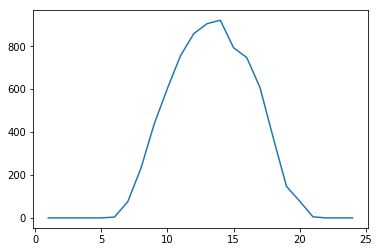

In [52]:
plt.plot(range(1, 25), day['Glo Mod (Wh/m^2)']);
plt.show()